In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


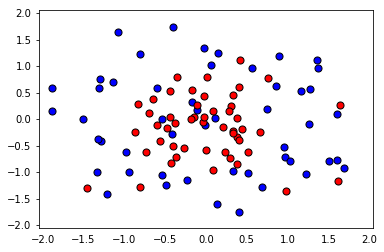

In [92]:
def load_pts(csv_name):
    data = np.asarray(pd.read_csv(csv_name, header = None))
    X=data[:,0:2]
    y=data[:,2]
    
    plt.scatter(X[np.argwhere(y==0).flatten(),0], X[np.argwhere(y==0).flatten(),1], s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0], X[np.argwhere(y==1).flatten(),1], s = 50, color = 'red', edgecolor = 'k')
    
    plt.xlim(-2.05, 2.05)
    plt.ylim(-2.05, 2.05)
    plt.tick_params(axis = 'x', which = 'both', bottom = 'off', top = 'off')
    
    return (X,y)

X,y = load_pts('data.csv')
plt.show()

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, make_scorer

#Fixing a random seed
import random
random.seed(42)

#Apply spliting of data ponits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)



In [94]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [95]:
# This function will plot the data point, divide the whole cartesioan into 2 filed. And finally create a boundary accros the data 
# which are in our favour (having output 1)
def plot_model(X, y, model):
    
    plt.scatter(X[np.argwhere(y==0).flatten(),0], X[np.argwhere(y==0).flatten(),1], s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0], X[np.argwhere(y==1).flatten(),1], s = 50, color = 'red', edgecolor = 'k')
    
    plt.xlim(-2.05, 2.05)
    plt.ylim(-2.05, 2.05)
    plt.tick_params(axis = 'x', which = 'both', bottom = 'off', top = 'off')
    
    r = np.linspace(-2.1,2.1,300)
    s,t = np.meshgrid(r,r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)
    
    z = model.predict(h)
    
    s = np.reshape(s,(np.size(r), np.size(r)))
    t = np.reshape(t,(np.size(r), np.size(r)))
    z = np.reshape(z,(np.size(r), np.size(r)))
    
    plt.contourf(s,t,z, colors = ['blue', 'red'], alpha = 0.2, levels = range(-1,2))
    if len(np.unique(z)) >= 1: 
        plt.contour(s,t,z, colors = 'k', linewidth = 2)
    plt.show()
    

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


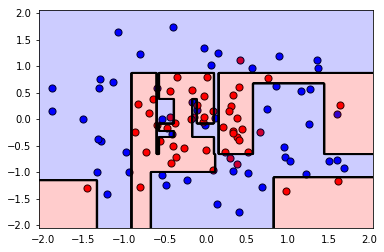

The training F1-Score: 1.0
The testing F1-Score: 0.631578947368421


In [96]:
plot_model(X,y,model)
print('The training F1-Score: {}' .format(f1_score(y_train, train_pred)))
print('The testing F1-Score: {}' .format(f1_score(y_test, test_pred)))

The best training F1-Score: 0.8148148148148148
The best testing F1-Score: 0.8


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


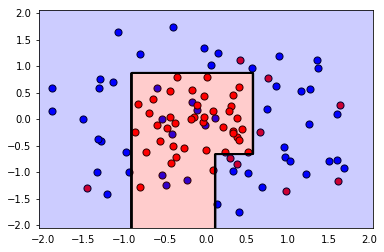

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [100]:
# This model look to complexed and can be overfit to our dataset
# Lets do the same with grid search
# Here we will imporve our model by optimising the parameter of Decision tree: max_depth, min_samples_leaf, min_samples_split

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

parameters = {'max_depth': [2,4,6,8,10], 'min_samples_leaf': [2,4,6,8,10], 'min_samples_split': [2,4,6,8,10]}

model = DecisionTreeClassifier(random_state = 42)

scorer = make_scorer(f1_score)

grid_obj = GridSearchCV(model, parameters, scoring = scorer)

grid_fit = grid_obj.fit(X_train,y_train)

best_clf = grid_fit.best_estimator_

# Fit the new model
best_clf.fit(X_train, y_train)

# Make prediction again
best_train_pred = best_clf.predict(X_train)
best_test_pred = best_clf.predict(X_test)

print('The best training F1-Score: {}' .format(f1_score(y_train, best_train_pred)))
print('The best testing F1-Score: {}' .format(f1_score(y_test, best_test_pred)))

plot_model(X,y,best_clf)

# Check the parameters used in best model 
best_clf